# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


## General Assignment Instructions

These instructions are included in every assignment, to remind you of the coding standards for the class. Feel free to delete this cell after reading it. 

One sign of mature code is conforming to a style guide. We recommend the [Google Python Style Guide](https://google.github.io/styleguide/pyguide.html). If you use a different style guide, please include a cell with a link. 

Your code should be relatively easy-to-read, sensibly commented, and clean. Writing code is a messy process, so please be sure to edit your final submission. Remove any cells that are not needed or parts of cells that contain unnecessary code. Remove inessential `import` statements and make sure that all such statements are moved into the designated cell. 

Make use of non-code cells for written commentary. These cells should be grammatical and clearly written. In some of these cells you will have questions to answer. The questions will be marked by a "Q:" and will have a corresponding "A:" spot for you. *Make sure to answer every question marked with a `Q:` for full credit.* 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [26]:
# Add any additional import statements you need here

#!pip install matplotlib
import matplotlib.pyplot as plt
import string



Matplotlib is building the font cache; this may take a moment.


In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "'/Users/edgarrosales/Desktop/UniversitySandiego/MastersProgram/programA/ADS509/ads509-mod2.1/M1 Results'"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    num_characters = sum(len(token) for token in tokens)
    lexical_diversity = num_unique_tokens / num_tokens if num_tokens > 0 else 0
    
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])
    

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.


Q: Why is it beneficial to use assertion statements in your code? 

A: Using assertion statements helps catch errors early by verifying assumptions in your code. They improve code reliability, make debugging easier, and act as built-in checks to prevent silent failures. 

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [7]:
data_location = "/Users/edgarrosales/Desktop/UniversitySandiego/MastersProgram/programA/ADS509/ads509-mod2.1/M1 Results"
lyrics_dir = os.path.join(data_location, "lyrics")

all_lyrics = []

for artist_folder in os.listdir(lyrics_dir):
    artist_path = os.path.join(lyrics_dir, artist_folder)
    if os.path.isdir(artist_path):
        for file in os.listdir(artist_path):
            file_path = os.path.join(artist_path, file)
            with open(file_path, "r", encoding="utf-8") as f:
                all_lyrics.extend(f.read().split())


In [11]:
twitter_folder = os.path.join(data_location, "twitter")
txt_files = [f for f in os.listdir(twitter_folder) if f.endswith(".txt")]

first_txt_file = os.path.join(twitter_folder, txt_files[0])

with open(first_txt_file, "r", encoding="utf-8") as f:
    twitter_data = f.read().split()


## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [ ]:
punctuation = set(punctuation) # speeds up comparison

In [13]:
# create your clean twitter data here

# Setup
punctuation = set(string.punctuation)
stop_words = set(stopwords.words("english"))

# Clean twitter data
clean_twitter = []

for word in twitter_data:
    # remove punctuation from each word
    word = ''.join(char for char in word if char not in punctuation)
    
    # lowercase and check if it's not a stopword and not empty
    word = word.lower()
    
    if word and word not in stop_words:
        clean_twitter.append(word)


In [14]:
# create your clean lyrics data here

# Clean lyrics data
clean_lyrics = []

for word in all_lyrics:
    # remove punctuation
    word = ''.join(char for char in word if char not in punctuation)
    
    # lowercase
    word = word.lower()
    
    # remove stopwords and empty strings
    if word and word not in stop_words:
        clean_lyrics.append(word)


## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [17]:
# descriptive_stats here

print("Lyrics Descriptive Stats:")
descriptive_stats(clean_lyrics)

print("\nTwitter Descriptive Stats:")
descriptive_stats(clean_twitter)




Lyrics Descriptive Stats:
There are 51143 tokens in the data.
There are 4664 unique tokens in the data.
There are 246421 characters in the data.
The lexical diversity is 0.091 in the data.

Twitter Descriptive Stats:
There are 42404149 tokens in the data.
There are 10667109 unique tokens in the data.
There are 266424726 characters in the data.
The lexical diversity is 0.252 in the data.


[42404149, 10667109, 0.2515581435203428, 266424726]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 words would be common filler word like "the", "and" and "to"

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: Expected lyrics to be more diverse than tweets due to richer language in songs.





## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [18]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 



In [19]:
import emoji

# follower description files
cher_file = os.path.join(data_location, "twitter", "cher_followers_data.txt")
robyn_file = os.path.join(data_location, "twitter", "robynkonichiwa_followers_data.txt")

# extract emojis from text
def extract_emojis(text):
    return [char for char in text if emoji.is_emoji(char)]

# read files and extract emojis
def top_emojis(file_path, top_n=10):
    all_emojis = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            all_emojis.extend(extract_emojis(line))
    return Counter(all_emojis).most_common(top_n)

# top 10 emojis per artist
cher_emojis = top_emojis(cher_file)
robyn_emojis = top_emojis(robyn_file)

# results
print("Top 10 Emojis - Cher Followers:")
for e, count in cher_emojis:
    print(f"{e} : {count}")

print("\nTop 10 Emojis - Robyn Followers:")
for e, count in robyn_emojis:
    print(f"{e} : {count}")


Top 10 Emojis - Cher Followers:
❤ : 94506
🌈 : 66291
♥ : 48059
🏳 : 47174
✨ : 45846
🌊 : 31234
💙 : 31050
🏻 : 25195
✌ : 21963
💜 : 21571

Top 10 Emojis - Robyn Followers:
🌈 : 6086
❤ : 5635
🏳 : 4641
♥ : 4249
✨ : 3217
🏻 : 1751
✌ : 1495
♀ : 1347
🏼 : 1340
💙 : 1200


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [20]:
# Your code here
# Function to extract hashtags from text
def extract_hashtags(text):
    words = text.split()
    return [word.lower() for word in words if word.startswith("#") and len(word) > 1]

# Read files and extract hashtags
def top_hashtags(file_path, top_n=10):
    all_hashtags = []
    with open(file_path, "r", encoding="utf-8") as f:
        for line in f:
            all_hashtags.extend(extract_hashtags(line))
    return Counter(all_hashtags).most_common(top_n)

# top 10 hashtags per artist
cher_hashtags = top_hashtags(cher_file)
robyn_hashtags = top_hashtags(robyn_file)

# results
print("Top 10 Hashtags - Cher Followers:")
for h, count in cher_hashtags:
    print(f"{h} : {count}")

print("\nTop 10 Hashtags - Robyn Followers:")
for h, count in robyn_hashtags:
    print(f"{h} : {count}")


Top 10 Hashtags - Cher Followers:
#resist : 9729
#blm : 9271
#blacklivesmatter : 7770
#fbr : 2991
#theresistance : 2929
#1 : 2580
#resistance : 2438
#voteblue : 1939
#lgbtq : 1461
#music : 1315

Top 10 Hashtags - Robyn Followers:
#blacklivesmatter : 601
#blm : 365
#music : 262
#1 : 213
#teamfollowback : 118
#edm : 104
#resist : 77
#freebritney : 70
#blacktranslivesmatter : 58
#lgbtq : 58


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [22]:
def extract_title_words(artist_folder):
    title_words = []
    for filename in os.listdir(artist_folder):
        file_path = os.path.join(artist_folder, filename)
        with open(file_path, "r", encoding="utf-8") as f:
            title_line = f.readline().strip()
            for word in title_line.split():
                # Clean word: remove punctuation, lowercase, filter stopwords
                word_clean = ''.join(char for char in word if char not in punctuation).lower()
                if word_clean and word_clean not in stop_words:
                    title_words.append(word_clean)
    return Counter(title_words).most_common(5)

# folder paths
cher_folder = os.path.join(data_location, "lyrics", "cher")
robyn_folder = os.path.join(data_location, "lyrics", "robyn")

# Get top 5 title words
cher_title_counts = extract_title_words(cher_folder)
robyn_title_counts = extract_title_words(robyn_folder)

print("Top 5 Words in Cher Song Titles:")
for word, count in cher_title_counts:
    print(f"{word} : {count}")

print("\nTop 5 Words in Robyn Song Titles:")
for word, count in robyn_title_counts:
    print(f"{word} : {count}")


Top 5 Words in Cher Song Titles:
love : 38
man : 12
song : 11
dont : 10
come : 7

Top 5 Words in Robyn Song Titles:
love : 6
dont : 4
u : 4
hang : 3
tell : 3


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

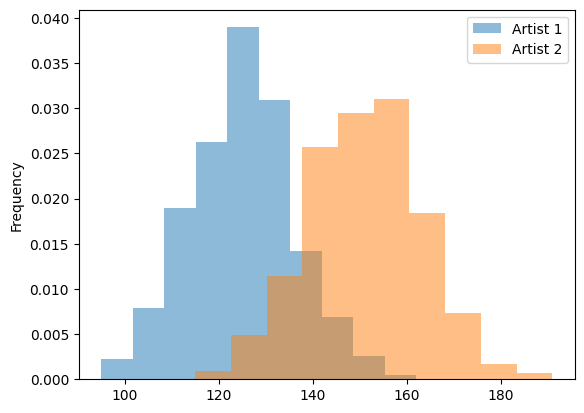

In [27]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: whitespace 


In [28]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

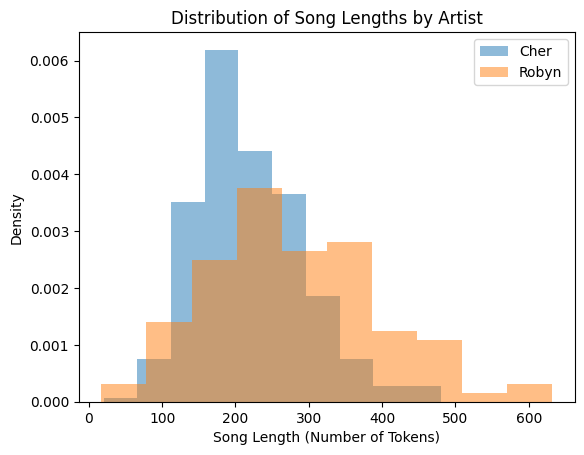

In [30]:
#lyric length comparison chart here. 
def get_song_lengths(artist_folder, artist_name):
    lengths = []
    for filename in os.listdir(artist_folder):
        file_path = os.path.join(artist_folder, filename)
        with open(file_path, "r", encoding="utf-8") as f:
            lines = f.readlines()
            lyrics = " ".join(lines[1:])  # Skip the title (line 0), use the rest
            tokens = lyrics.split()
            lengths.append(len(tokens))
    return pd.DataFrame({
        "artist": [artist_name] * len(lengths),
        "length": lengths
    })


# song lengths
cher_df = get_song_lengths(cher_folder, "Cher")
robyn_df = get_song_lengths(robyn_folder, "Robyn")

# combine
length_df = pd.concat([cher_df, robyn_df])

# plot
length_df.groupby('artist')['length'].plot(kind="hist", density=True, alpha=0.5, legend=True)
plt.xlabel("Song Length (Number of Tokens)")
plt.ylabel("Density")
plt.title("Distribution of Song Lengths by Artist")
plt.show()
